# Data processing and plots

In [176]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [178]:
df = pd.read_csv("/Users/rahulsehgal/Downloads/archive (1)/full_data.csv")

<AxesSubplot: xlabel='stroke', ylabel='age'>

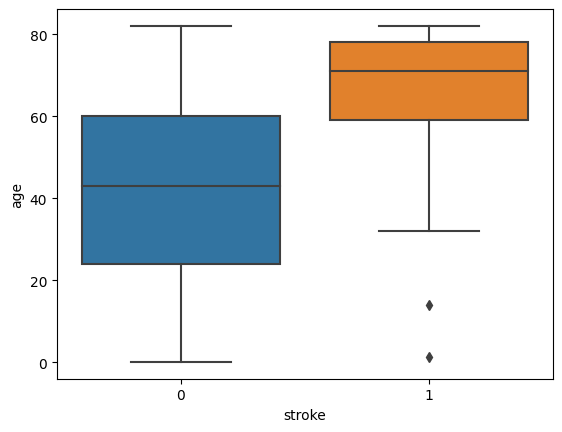

In [179]:
sns.boxplot(data=df,x='stroke',y='age')

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

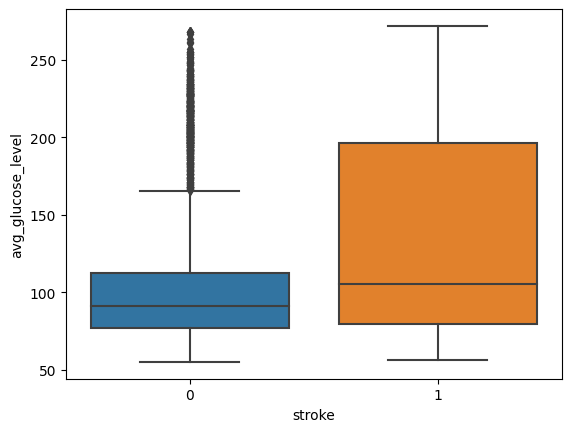

In [180]:
sns.boxplot(data=df,x='stroke',y='avg_glucose_level')

<AxesSubplot: xlabel='stroke', ylabel='bmi'>

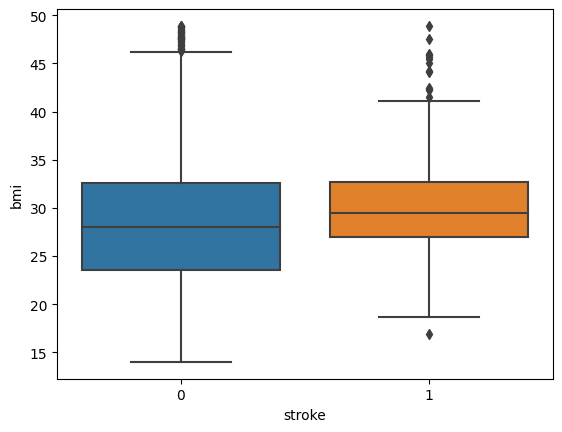

In [181]:
sns.boxplot(data=df,x='stroke',y='bmi')

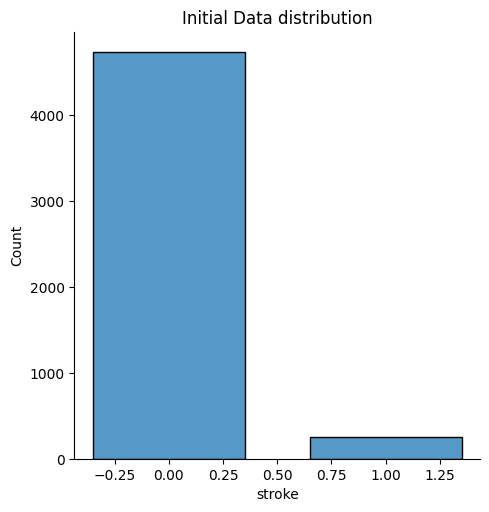

In [182]:
sns.displot(df["stroke"],discrete="True",shrink=0.7).set(title="Initial Data distribution")

In [183]:
le = preprocessing.LabelEncoder()
new = le.fit_transform(df['gender'])
df['gender'] = new
new = le.fit_transform(df['ever_married'])
df['ever_married'] = new
new = le.fit_transform(df['work_type'])
df['work_type'] = new
new = le.fit_transform(df['Residence_type'])
df['Residence_type'] = new
new = le.fit_transform(df['smoking_status'])
df['smoking_status'] = new

In [184]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('stroke',axis=1),df['stroke'])
scores=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,scores],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,322.045639
3,heart_disease,91.884086
7,avg_glucose_level,89.971820
2,hypertension,88.245189
4,ever_married,59.199605
8,bmi,16.187059
5,work_type,8.729184
9,smoking_status,3.758131
6,Residence_type,1.354940
0,gender,0.391752


In [185]:
col = fscores[fscores['Score']>2]['Attribute']
col

1                  age
2         hypertension
3        heart_disease
4         ever_married
5            work_type
7    avg_glucose_level
8                  bmi
9       smoking_status
Name: Attribute, dtype: object

In [186]:
df = pd.get_dummies(df,drop_first=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [188]:
y = df["stroke"]
x = df.drop("stroke",axis=1)

In [189]:
st= StandardScaler()    
x= st.fit_transform(x)

In [190]:
#ADABOOST
classifier= AdaBoostClassifier(random_state = 0, base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators= 150)


scoring = ['precision_macro', 'recall_macro','f1_macro','f1_micro','balanced_accuracy']

scores = cross_validate(classifier, x, y, cv=5,scoring=scoring)
print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
print('Precision macros:', np.mean(scores['test_precision_macro']))
print('Recall macros:', np.mean(scores['test_recall_macro']))
print('F1 macros:', np.mean(scores['test_f1_macro']))


Balanced Accuracy: 0.503130928191883
Precision macros: 0.5502518841367218
Recall macros: 0.503130928191883
F1 macros: 0.49455488397927655


In [191]:
#RANDOM FOREST

classifier= RandomForestClassifier(n_estimators= 500, criterion="gini")


scoring = ['precision_macro', 'recall_macro','f1_macro','f1_micro','balanced_accuracy']
scores = cross_validate(classifier, x, y, cv=5,scoring=scoring)
print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
print('Precision macros:', np.mean(scores['test_precision_macro']))
print('Recall macros:', np.mean(scores['test_recall_macro']))
print('F1 macros:', np.mean(scores['test_f1_macro']))

Balanced Accuracy: 0.49915489215972997
Precision macros: 0.4750653670768329
Recall macros: 0.49915489215972997
F1 macros: 0.486812247246176


In [192]:
#Logistic Regression
classifier = LogisticRegression(random_state = 0,C= 1, max_iter= 100, solver= 'liblinear')


scoring = ['precision_macro', 'recall_macro','f1_macro','f1_micro','balanced_accuracy']

scores = cross_validate(classifier, x, y, cv=5,scoring=scoring)
print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
print('Precision macros:', np.mean(scores['test_precision_macro']))
print('Recall macros:', np.mean(scores['test_recall_macro']))
print('F1 macros:', np.mean(scores['test_f1_macro']))

Balanced Accuracy: 0.5018296230847143
Precision macros: 0.5251911972633871
Recall macros: 0.5018296230847143
F1 macros: 0.49110108436432026


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
#MLP 

classifier = MLPClassifier(activation='identity', batch_size=128, hidden_layer_sizes=[256, 32], solver='adam')


scoring = ['precision_macro', 'recall_macro','f1_macro','f1_micro','balanced_accuracy']

scores = cross_validate(classifier, x, y, cv=5,scoring=scoring)
print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
print('Precision macros:', np.mean(scores['test_precision_macro']))
print('Recall macros:', np.mean(scores['test_recall_macro']))
print('F1 macros:', np.mean(scores['test_f1_macro']))

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Balanced Accuracy: 0.5076697627308578
Precision macros: 0.543800960625
Recall macros: 0.5076697627308578
F1 macros: 0.5027968132120513


In [194]:
#SVM

classifier = svm.SVC(C=0.01, kernel='linear')

from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro','f1_macro','f1_micro','balanced_accuracy']

scores = cross_validate(classifier, x, y, cv=5,scoring=scoring)
print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
print('Precision macros:', np.mean(scores['test_precision_macro']))
print('Recall macros:', np.mean(scores['test_recall_macro']))
print('F1 macros:', np.mean(scores['test_f1_macro']))

Balanced Accuracy: 0.5
Precision macros: 0.47510543679230455
Recall macros: 0.5
F1 macros: 0.4872349061687462


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedM

# Undersampling

In [195]:
print("Before Data Resampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Data Resampling, counts of label '0': {} \n".format(sum(y == 0)))

from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(x, y)
  
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0)))

Before Data Resampling, counts of label '1': 248
Before Data Resampling, counts of label '0': 4733 

After OverSampling, counts of label '1': 248
After OverSampling, counts of label '0': 248


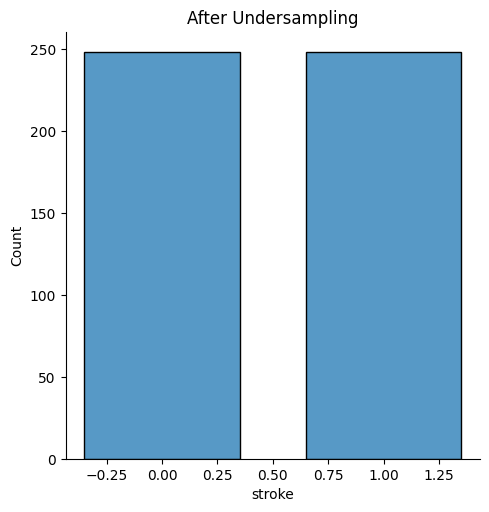

In [196]:
df_under = pd.DataFrame(X_resampled)
df_under["stroke"] = y_resampled
sns.displot(df_under["stroke"],discrete="True",shrink=0.7).set(title="After Undersampling")

In [197]:
from sklearn.model_selection import cross_validate

def cross_val(classifier):
  scoring = ['precision_macro', 'recall_macro','f1_macro','f1_micro','balanced_accuracy']
  scores = cross_validate(classifier, X_resampled, y_resampled, cv=5,scoring=scoring)

  print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
  print('Precision macros:', np.mean(scores['test_precision_macro']))
  print('Recall macros:', np.mean(scores['test_recall_macro']))
  print('F1 macros:', np.mean(scores['test_f1_macro']))
  print('F1 micros:', np.mean(scores['test_f1_micro']))

In [65]:
from sklearn.model_selection import GridSearchCV

clf = AdaBoostClassifier(random_state = 0)

param_grid = {'base_estimator': [DecisionTreeClassifier(max_depth = 1),DecisionTreeClassifier(max_depth = 2),DecisionTreeClassifier(max_depth = 3)],
              'n_estimators':[50,100,150],
              'learning_rate':[1,0.1,0.01]
             } 
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50
[CV 1/5; 1/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50;, score=0.910 total time=   0.0s
[CV 2/5; 1/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50
[CV 2/5; 1/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50;, score=0.929 total time=   0.0s
[CV 3/5; 1/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50
[CV 3/5; 1/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50;, score=0.929 total time=   0.0s
[CV 4/5; 1/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50
[CV 4/5; 1/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=50

[CV 1/5; 8/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=0.680 total time=   0.1s
[CV 2/5; 8/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100
[CV 2/5; 8/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=0.707 total time=   0.1s
[CV 3/5; 8/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100
[CV 3/5; 8/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=0.727 total time=   0.1s
[CV 4/5; 8/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100
[CV 4/5; 8/27] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100;, score=0.758 total time=   0.0s
[CV 5/5; 8/27] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=

[CV 1/5; 15/27] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150;, score=0.930 total time=   0.1s
[CV 2/5; 15/27] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150
[CV 2/5; 15/27] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150;, score=0.960 total time=   0.1s
[CV 3/5; 15/27] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150
[CV 3/5; 15/27] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150;, score=0.970 total time=   0.1s
[CV 4/5; 15/27] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150
[CV 4/5; 15/27] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150;, score=0.980 total time=   0.1s
[CV 5/5; 15/27] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=

[CV 5/5; 21/27] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=150;, score=0.899 total time=   0.1s
[CV 1/5; 22/27] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50
[CV 1/5; 22/27] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=0.900 total time=   0.0s
[CV 2/5; 22/27] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50
[CV 2/5; 22/27] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=0.949 total time=   0.0s
[CV 3/5; 22/27] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50
[CV 3/5; 22/27] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50;, score=0.919 total time=   0.0s
[CV 4/5; 22/27] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.1, n_estimators=50
[CV 4

In [199]:
#ADABOOST
classifier= AdaBoostClassifier(random_state = 0, base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators= 150)
cross_val(classifier)

Balanced Accuracy: 0.9557551020408163
Precision macros: 0.957549530338451
Recall macros: 0.9557551020408163
F1 macros: 0.9556255581850138
F1 micros: 0.9556969696969697


In [70]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state = 0)

param_grid = {'criterion': ['gini','entropy','log_loss'],
              'max_depth':[None,2,3,4],
              'n_estimators':[100,500,1000]
             } 
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 1/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.870 total time=   0.1s
[CV 2/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 2/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.889 total time=   0.1s
[CV 3/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 3/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.889 total time=   0.1s
[CV 4/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 4/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.899 total time=   0.1s
[CV 5/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 5/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.848 total time=   0.1s
[CV 1/5; 2/36] START criteri

[CV 5/5; 10/36] END criterion=gini, max_depth=4, n_estimators=100;, score=0.808 total time=   0.0s
[CV 1/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 1/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.830 total time=   0.2s
[CV 2/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 2/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.869 total time=   0.2s
[CV 3/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 3/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.879 total time=   0.2s
[CV 4/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 4/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.869 total time=   0.2s
[CV 5/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 5/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.818 total time=   0.2s
[

[CV 5/5; 19/36] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.727 total time=   0.0s
[CV 1/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 1/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.800 total time=   0.2s
[CV 2/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 2/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.838 total time=   0.2s
[CV 3/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 3/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.848 total time=   0.2s
[CV 4/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 4/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.859 total time=   0.2s
[CV 5/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 5/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.778 to

[CV 5/5; 28/36] END criterion=log_loss, max_depth=2, n_estimators=100;, score=0.727 total time=   0.0s
[CV 1/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 1/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.790 total time=   0.2s
[CV 2/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 2/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.778 total time=   0.2s
[CV 3/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 3/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.859 total time=   0.2s
[CV 4/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 4/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.838 total time=   0.2s
[CV 5/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 5/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.

In [200]:
#RANDOM FOREST
classifier= RandomForestClassifier(n_estimators= 500, criterion="gini")    
cross_val(classifier)

Balanced Accuracy: 0.8731428571428571
Precision macros: 0.8748194401684696
Recall macros: 0.8731428571428571
F1 macros: 0.8728672736927248
F1 micros: 0.8730101010101009


In [72]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state = 0)

param_grid = {'C': [1,2,3,4],
              'max_iter':[100,500,1000],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             } 
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 1/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.630 total time=   0.0s
[CV 2/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 2/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.636 total time=   0.0s
[CV 3/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 3/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.677 total time=   0.0s
[CV 4/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 4/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.747 total time=   0.0s
[CV 5/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 5/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.677 total time=   0.0s
[CV 1/5; 2/60] START C=1, max_iter=100, solver=lbfgs............................
[CV 1/5; 2/6

[CV 4/5; 30/60] END C=2, max_iter=1000, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5; 30/60] START C=2, max_iter=1000, solver=saga...........................
[CV 5/5; 30/60] END C=2, max_iter=1000, solver=saga;, score=0.677 total time=   0.0s
[CV 1/5; 31/60] START C=3, max_iter=100, solver=newton-cg.......................
[CV 1/5; 31/60] END C=3, max_iter=100, solver=newton-cg;, score=0.630 total time=   0.0s
[CV 2/5; 31/60] START C=3, max_iter=100, solver=newton-cg.......................
[CV 2/5; 31/60] END C=3, max_iter=100, solver=newton-cg;, score=0.636 total time=   0.0s
[CV 3/5; 31/60] START C=3, max_iter=100, solver=newton-cg.......................
[CV 3/5; 31/60] END C=3, max_iter=100, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 4/5; 31/60] START C=3, max_iter=100, solver=newton-cg.......................
[CV 4/5; 31/60] END C=3, max_iter=100, solver=newton-cg;, score=0.747 total time=   0.0s
[CV 5/5; 31/60] START C=3, max_iter=100, solver=newton-cg............

In [201]:
#Logistic Regression
classifier = LogisticRegression(random_state = 0,C= 1, max_iter= 100, solver= 'liblinear')
cross_val(classifier)

Balanced Accuracy: 0.6817142857142857
Precision macros: 0.6853386930529787
Recall macros: 0.6817142857142857
F1 macros: 0.6799745664372348
F1 micros: 0.6815151515151515


In [80]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier(batch_size=128,max_iter=5000,random_state=0)

param_grid = {'activation': ['relu','identity'],
              'batch_size':['auto',128],
              'solver':['adam','sgd','lbfgs'],
            'hidden_layer_sizes':[[100,],[256,32]]}
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 1/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.640 total time=   1.5s
[CV 2/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 2/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.566 total time=   1.5s
[CV 3/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 3/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.667 total time=   1.4s
[CV 4/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 4/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.606 total time=   1.4s
[CV 5/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_si

[CV 3/5; 8/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd;, score=0.646 total time=   0.6s
[CV 4/5; 8/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd
[CV 4/5; 8/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd;, score=0.727 total time=   0.6s
[CV 5/5; 8/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd
[CV 5/5; 8/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd;, score=0.667 total time=   0.5s
[CV 1/5; 9/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs
[CV 1/5; 9/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs;, score=0.620 total time=   0.1s
[CV 2/5; 9/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs
[CV 2/5; 9/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs;, score=0.646 total time=   0.1s
[CV 3/5; 9/24] STA

[CV 2/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.636 total time=   0.1s
[CV 3/5; 16/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam
[CV 3/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.667 total time=   0.1s
[CV 4/5; 16/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam
[CV 4/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.758 total time=   0.1s
[CV 5/5; 16/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam
[CV 5/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.687 total time=   0.1s
[CV 1/5; 17/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=sgd
[CV 1/5; 17/24] END activation=identity, batch_size=auto, hid

[CV 3/5; 23/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd;, score=0.697 total time=   0.3s
[CV 4/5; 23/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd
[CV 4/5; 23/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd;, score=0.717 total time=   0.3s
[CV 5/5; 23/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd
[CV 5/5; 23/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd;, score=0.677 total time=   0.3s
[CV 1/5; 24/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=lbfgs
[CV 1/5; 24/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=lbfgs;, score=0.630 total time=   0.3s
[CV 2/5; 24/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=lbfgs
[CV 2/5; 24/24] END activation=identity, batch_size=128, hidden_layer_

In [202]:
#MLP
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(activation='identity', batch_size=128, hidden_layer_sizes=[256, 32], solver='adam')
cross_val(classifier)

Balanced Accuracy: 0.7139591836734693
Precision macros: 0.7191628368149893
Recall macros: 0.7139591836734693
F1 macros: 0.7123233613689188
F1 micros: 0.7137575757575758


In [87]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(kernel='linear',C=100)

param_grid = {'kernel':['linear','poly','rbf','sigmoid'],
              'C':[0.01,0.1,1,10,100],
              'max_iter':[-1,10,50]
             }
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 1/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.670 total time=   0.0s
[CV 2/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 2/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.677 total time=   0.0s
[CV 3/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 3/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.697 total time=   0.0s
[CV 4/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 4/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.667 total time=   0.0s
[CV 5/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 5/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.717 total time=   0.0s
[CV 1/5; 2/60] START C=0.01, kernel=linear, max_iter=10.........................
[CV 1/5; 2/60] EN

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

[CV 4/5; 22/60] END C=0.1, kernel=sigmoid, max_iter=-1;, score=0.657 total time=   0.0s
[CV 5/5; 22/60] START C=0.1, kernel=sigmoid, max_iter=-1........................
[CV 5/5; 22/60] END C=0.1, kernel=sigmoid, max_iter=-1;, score=0.667 total time=   0.0s
[CV 1/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10........................
[CV 1/5; 23/60] END C=0.1, kernel=sigmoid, max_iter=10;, score=0.620 total time=   0.0s
[CV 2/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10........................
[CV 2/5; 23/60] END C=0.1, kernel=sigmoid, max_iter=10;, score=0.626 total time=   0.0s
[CV 3/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10........................
[CV 3/5; 23/60] END C=0.1, kernel=sigmoid, max_iter=10;, score=0.636 total time=   0.0s
[CV 4/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10........................
[CV 4/5; 23/60] END C=0.1, kernel=sigmoid, max_iter=10;, score=0.545 total time=   0.0s
[CV 5/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10...........

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

[CV 5/5; 40/60] END C=10, kernel=poly, max_iter=-1;, score=0.616 total time=   0.0s
[CV 1/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 1/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.560 total time=   0.0s
[CV 2/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 2/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.556 total time=   0.0s
[CV 3/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 3/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.505 total time=   0.0s
[CV 4/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 4/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.455 total time=   0.0s
[CV 5/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 5/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.535 total time=   0.0s
[CV 1/5; 42/60] START C=10, kernel=poly, max_iter=50............................
[CV 1/5; 4

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

[CV 2/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.626 total time=   0.1s
[CV 3/5; 49/60] START C=100, kernel=linear, max_iter=-1.........................
[CV 3/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.657 total time=   0.1s
[CV 4/5; 49/60] START C=100, kernel=linear, max_iter=-1.........................
[CV 4/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.758 total time=   0.1s
[CV 5/5; 49/60] START C=100, kernel=linear, max_iter=-1.........................
[CV 5/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.677 total time=   0.1s
[CV 1/5; 50/60] START C=100, kernel=linear, max_iter=10.........................
[CV 1/5; 50/60] END C=100, kernel=linear, max_iter=10;, score=0.430 total time=   0.0s
[CV 2/5; 50/60] START C=100, kernel=linear, max_iter=10.........................
[CV 2/5; 50/60] END C=100, kernel=linear, max_iter=10;, score=0.616 total time=   0.0s
[CV 3/5; 50/60] START C=100, kernel=linear, max_iter=10..................

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

In [203]:
#SVM
from sklearn import svm
classifier = svm.SVC(C=0.01, kernel='linear')
cross_val(classifier)

Balanced Accuracy: 0.6855510204081633
Precision macros: 0.7207045016338844
Recall macros: 0.6855510204081633
F1 macros: 0.6729789696127494
F1 micros: 0.6855151515151514


# Oversampling

In [204]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x, y)
  
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 248
Before OverSampling, counts of label '0': 4733 

After OverSampling, counts of label '1': 4733
After OverSampling, counts of label '0': 4733


In [205]:
df_new = pd.DataFrame(X_train_res)

In [206]:
df_new["stroke"] = y_train_res 

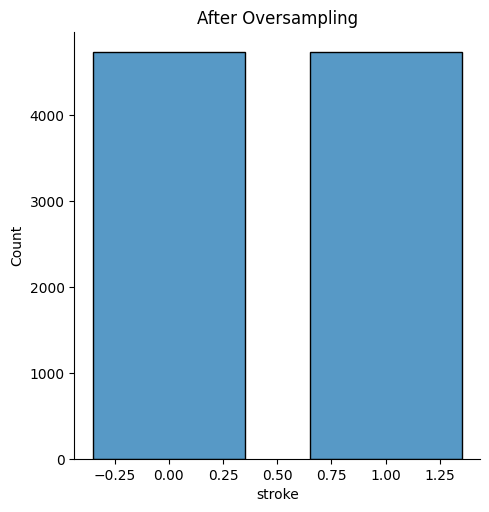

In [207]:
sns.displot(df_new["stroke"],discrete="True",shrink=0.7).set(title="After Oversampling")

In [208]:
from sklearn.model_selection import cross_validate

def cross_val_oversample(classifier):
  scoring = ['precision_macro', 'recall_macro','f1_macro','balanced_accuracy']
  scores = cross_validate(classifier, X_train_res, y_train_res, cv=5,scoring=scoring)

  print('Balanced Accuracy:', np.mean(scores['test_balanced_accuracy']))
  print('Precision macros:', np.mean(scores['test_precision_macro']))
  print('Recall macros:', np.mean(scores['test_recall_macro']))
  print('F1 macros:', np.mean(scores['test_f1_macro']))

In [107]:
from sklearn.model_selection import GridSearchCV

clf = AdaBoostClassifier(random_state = 0)

param_grid = {'base_estimator': [DecisionTreeClassifier(max_depth = 1),DecisionTreeClassifier(max_depth = 2),DecisionTreeClassifier(max_depth = 3)],
              'n_estimators':[10,50,100,150],
              'learning_rate':[1,0.1,0.01]
             } 
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_train_res,y_train_res) 

print(grid.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10
[CV 1/5; 1/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10;, score=0.777 total time=   0.1s
[CV 2/5; 1/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10
[CV 2/5; 1/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10;, score=0.792 total time=   0.0s
[CV 3/5; 1/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10
[CV 3/5; 1/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10;, score=0.783 total time=   0.0s
[CV 4/5; 1/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10
[CV 4/5; 1/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=10

[CV 4/5; 7/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=0.824 total time=   0.3s
[CV 5/5; 7/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100
[CV 5/5; 7/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100;, score=0.815 total time=   0.3s
[CV 1/5; 8/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150
[CV 1/5; 8/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150;, score=0.808 total time=   0.5s
[CV 2/5; 8/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150
[CV 2/5; 8/36] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150;, score=0.838 total time=   0.5s
[CV 3/5; 8/36] START base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150
[CV 

[CV 2/5; 14/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50;, score=0.935 total time=   0.3s
[CV 3/5; 14/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50
[CV 3/5; 14/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50;, score=0.931 total time=   0.3s
[CV 4/5; 14/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50
[CV 4/5; 14/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50;, score=0.931 total time=   0.3s
[CV 5/5; 14/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50
[CV 5/5; 14/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=50;, score=0.934 total time=   0.3s
[CV 1/5; 15/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=1, n_estimators=100
[CV 1/5; 15/36] END

[CV 5/5; 20/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.1, n_estimators=150;, score=0.966 total time=   0.8s
[CV 1/5; 21/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=10
[CV 1/5; 21/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=10;, score=0.779 total time=   0.1s
[CV 2/5; 21/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=10
[CV 2/5; 21/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=10;, score=0.791 total time=   0.1s
[CV 3/5; 21/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=10
[CV 3/5; 21/36] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=10;, score=0.781 total time=   0.1s
[CV 4/5; 21/36] START base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators

[CV 3/5; 27/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100;, score=0.968 total time=   0.7s
[CV 4/5; 27/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100
[CV 4/5; 27/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100;, score=0.978 total time=   0.8s
[CV 5/5; 27/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100
[CV 5/5; 27/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=100;, score=0.959 total time=   0.7s
[CV 1/5; 28/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=150
[CV 1/5; 28/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=150;, score=0.870 total time=   1.1s
[CV 2/5; 28/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1, n_estimators=150
[CV 2/5; 28/

[CV 1/5; 34/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=0.796 total time=   0.4s
[CV 2/5; 34/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50
[CV 2/5; 34/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=0.822 total time=   0.4s
[CV 3/5; 34/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50
[CV 3/5; 34/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=0.805 total time=   0.4s
[CV 4/5; 34/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50
[CV 4/5; 34/36] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators=50;, score=0.825 total time=   0.4s
[CV 5/5; 34/36] START base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.01, n_estimators

In [108]:
#ADABOOST
classifier= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 3),learning_rate=0.1,n_estimators= 150)  
cross_val_oversample(classifier)

Balanced Accuracy: 0.9641974991683988
Precision macros: 0.9697762882435074
Recall macros: 0.9641974991683988
F1 macros: 0.9637238401247382


In [109]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state = 0)

param_grid = {'criterion': ['gini','entropy','log_loss'],
              'max_depth':[None,2,3,4],
              'n_estimators':[100,500,1000]
             } 
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 1/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.870 total time=   0.1s
[CV 2/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 2/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.889 total time=   0.1s
[CV 3/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 3/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.889 total time=   0.1s
[CV 4/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 4/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.899 total time=   0.1s
[CV 5/5; 1/36] START criterion=gini, max_depth=None, n_estimators=100...........
[CV 5/5; 1/36] END criterion=gini, max_depth=None, n_estimators=100;, score=0.848 total time=   0.1s
[CV 1/5; 2/36] START criteri

[CV 5/5; 10/36] END criterion=gini, max_depth=4, n_estimators=100;, score=0.808 total time=   0.0s
[CV 1/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 1/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.830 total time=   0.2s
[CV 2/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 2/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.869 total time=   0.2s
[CV 3/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 3/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.879 total time=   0.2s
[CV 4/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 4/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.869 total time=   0.2s
[CV 5/5; 11/36] START criterion=gini, max_depth=4, n_estimators=500.............
[CV 5/5; 11/36] END criterion=gini, max_depth=4, n_estimators=500;, score=0.818 total time=   0.2s
[

[CV 5/5; 19/36] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.727 total time=   0.0s
[CV 1/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 1/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.800 total time=   0.2s
[CV 2/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 2/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.838 total time=   0.2s
[CV 3/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 3/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.848 total time=   0.2s
[CV 4/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 4/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.859 total time=   0.2s
[CV 5/5; 20/36] START criterion=entropy, max_depth=3, n_estimators=500..........
[CV 5/5; 20/36] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.778 to

[CV 5/5; 28/36] END criterion=log_loss, max_depth=2, n_estimators=100;, score=0.727 total time=   0.0s
[CV 1/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 1/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.790 total time=   0.2s
[CV 2/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 2/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.778 total time=   0.2s
[CV 3/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 3/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.859 total time=   0.2s
[CV 4/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 4/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.838 total time=   0.2s
[CV 5/5; 29/36] START criterion=log_loss, max_depth=2, n_estimators=500.........
[CV 5/5; 29/36] END criterion=log_loss, max_depth=2, n_estimators=500;, score=0.

In [110]:
#RANDOM FOREST
classifier= RandomForestClassifier(n_estimators= 100, criterion="gini")  
cross_val_oversample(classifier)

Balanced Accuracy: 0.9564791229006253
Precision macros: 0.957534571280157
Recall macros: 0.9564791229006253
F1 macros: 0.9564490086473849


In [111]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state = 0)

param_grid = {'C': [1,2,3,4],
              'max_iter':[100,500,1000],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             } 
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 1/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.630 total time=   0.0s
[CV 2/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 2/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.636 total time=   0.0s
[CV 3/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 3/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.677 total time=   0.0s
[CV 4/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 4/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.747 total time=   0.0s
[CV 5/5; 1/60] START C=1, max_iter=100, solver=newton-cg........................
[CV 5/5; 1/60] END C=1, max_iter=100, solver=newton-cg;, score=0.677 total time=   0.0s
[CV 1/5; 2/60] START C=1, max_iter=100, solver=lbfgs............................
[CV 1/5; 2/6

[CV 2/5; 29/60] END C=2, max_iter=1000, solver=sag;, score=0.636 total time=   0.0s
[CV 3/5; 29/60] START C=2, max_iter=1000, solver=sag............................
[CV 3/5; 29/60] END C=2, max_iter=1000, solver=sag;, score=0.667 total time=   0.0s
[CV 4/5; 29/60] START C=2, max_iter=1000, solver=sag............................
[CV 4/5; 29/60] END C=2, max_iter=1000, solver=sag;, score=0.747 total time=   0.0s
[CV 5/5; 29/60] START C=2, max_iter=1000, solver=sag............................
[CV 5/5; 29/60] END C=2, max_iter=1000, solver=sag;, score=0.677 total time=   0.0s
[CV 1/5; 30/60] START C=2, max_iter=1000, solver=saga...........................
[CV 1/5; 30/60] END C=2, max_iter=1000, solver=saga;, score=0.630 total time=   0.0s
[CV 2/5; 30/60] START C=2, max_iter=1000, solver=saga...........................
[CV 2/5; 30/60] END C=2, max_iter=1000, solver=saga;, score=0.636 total time=   0.0s
[CV 3/5; 30/60] START C=2, max_iter=1000, solver=saga...........................
[CV 3/5;

In [209]:
#Logistic Regression
classifier = LogisticRegression(C=1,max_iter=100,solver='liblinear')
cross_val_oversample(classifier)

Balanced Accuracy: 0.7878711230077847
Precision macros: 0.7907543848741226
Recall macros: 0.7878711230077847
F1 macros: 0.7873462371427367


In [114]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier(batch_size=128,max_iter=5000,random_state=0)

param_grid = {'activation': ['relu','identity'],
              'batch_size':['auto',128],
              'solver':['adam','sgd','lbfgs'],
            'hidden_layer_sizes':[[100,],[256,32]]}
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 1/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.640 total time=   1.5s
[CV 2/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 2/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.566 total time=   2.2s
[CV 3/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 3/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.667 total time=   1.5s
[CV 4/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam
[CV 4/5; 1/24] END activation=relu, batch_size=auto, hidden_layer_sizes=[100], solver=adam;, score=0.606 total time=   1.4s
[CV 5/5; 1/24] START activation=relu, batch_size=auto, hidden_layer_si

[CV 3/5; 8/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd;, score=0.646 total time=   1.0s
[CV 4/5; 8/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd
[CV 4/5; 8/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd;, score=0.727 total time=   1.0s
[CV 5/5; 8/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd
[CV 5/5; 8/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=sgd;, score=0.667 total time=   0.8s
[CV 1/5; 9/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs
[CV 1/5; 9/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs;, score=0.620 total time=   0.2s
[CV 2/5; 9/24] START activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs
[CV 2/5; 9/24] END activation=relu, batch_size=128, hidden_layer_sizes=[100], solver=lbfgs;, score=0.646 total time=   0.1s
[CV 3/5; 9/24] STA

[CV 2/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.636 total time=   0.1s
[CV 3/5; 16/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam
[CV 3/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.667 total time=   0.1s
[CV 4/5; 16/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam
[CV 4/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.758 total time=   0.1s
[CV 5/5; 16/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam
[CV 5/5; 16/24] END activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=adam;, score=0.687 total time=   0.1s
[CV 1/5; 17/24] START activation=identity, batch_size=auto, hidden_layer_sizes=[256, 32], solver=sgd
[CV 1/5; 17/24] END activation=identity, batch_size=auto, hid

[CV 3/5; 23/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd;, score=0.697 total time=   0.4s
[CV 4/5; 23/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd
[CV 4/5; 23/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd;, score=0.717 total time=   0.4s
[CV 5/5; 23/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd
[CV 5/5; 23/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=sgd;, score=0.677 total time=   0.4s
[CV 1/5; 24/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=lbfgs
[CV 1/5; 24/24] END activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=lbfgs;, score=0.630 total time=   0.3s
[CV 2/5; 24/24] START activation=identity, batch_size=128, hidden_layer_sizes=[256, 32], solver=lbfgs
[CV 2/5; 24/24] END activation=identity, batch_size=128, hidden_layer_

In [210]:
#MLP
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(256,32),solver='adam',batch_size=128,activation='identity')
cross_val_oversample(classifier)

Balanced Accuracy: 0.7878736903674897
Precision macros: 0.7912299112465624
Recall macros: 0.7878736903674897
F1 macros: 0.7872576055280007


In [116]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(kernel='linear',C=100)

param_grid = {'kernel':['linear','poly','rbf','sigmoid'],
              'C':[0.01,0.1,1,10,100],
              'max_iter':[-1,10,50]
             }
grid = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 10) 
grid.fit(X_resampled,y_resampled) 

print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 1/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.670 total time=   0.0s
[CV 2/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 2/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.677 total time=   0.0s
[CV 3/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 3/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.697 total time=   0.0s
[CV 4/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 4/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.667 total time=   0.0s
[CV 5/5; 1/60] START C=0.01, kernel=linear, max_iter=-1.........................
[CV 5/5; 1/60] END C=0.01, kernel=linear, max_iter=-1;, score=0.717 total time=   0.0s
[CV 1/5; 2/60] START C=0.01, kernel=linear, max_iter=10.........................
[CV 1/5; 2/60] EN

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

[CV 2/5; 22/60] END C=0.1, kernel=sigmoid, max_iter=-1;, score=0.677 total time=   0.0s
[CV 3/5; 22/60] START C=0.1, kernel=sigmoid, max_iter=-1........................
[CV 3/5; 22/60] END C=0.1, kernel=sigmoid, max_iter=-1;, score=0.687 total time=   0.0s
[CV 4/5; 22/60] START C=0.1, kernel=sigmoid, max_iter=-1........................
[CV 4/5; 22/60] END C=0.1, kernel=sigmoid, max_iter=-1;, score=0.657 total time=   0.0s
[CV 5/5; 22/60] START C=0.1, kernel=sigmoid, max_iter=-1........................
[CV 5/5; 22/60] END C=0.1, kernel=sigmoid, max_iter=-1;, score=0.667 total time=   0.0s
[CV 1/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10........................
[CV 1/5; 23/60] END C=0.1, kernel=sigmoid, max_iter=10;, score=0.620 total time=   0.0s
[CV 2/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10........................
[CV 2/5; 23/60] END C=0.1, kernel=sigmoid, max_iter=10;, score=0.626 total time=   0.0s
[CV 3/5; 23/60] START C=0.1, kernel=sigmoid, max_iter=10...........

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

[CV 2/5; 40/60] END C=10, kernel=poly, max_iter=-1;, score=0.626 total time=   0.0s
[CV 3/5; 40/60] START C=10, kernel=poly, max_iter=-1............................
[CV 3/5; 40/60] END C=10, kernel=poly, max_iter=-1;, score=0.697 total time=   0.0s
[CV 4/5; 40/60] START C=10, kernel=poly, max_iter=-1............................
[CV 4/5; 40/60] END C=10, kernel=poly, max_iter=-1;, score=0.707 total time=   0.0s
[CV 5/5; 40/60] START C=10, kernel=poly, max_iter=-1............................
[CV 5/5; 40/60] END C=10, kernel=poly, max_iter=-1;, score=0.616 total time=   0.0s
[CV 1/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 1/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.560 total time=   0.0s
[CV 2/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 2/5; 41/60] END C=10, kernel=poly, max_iter=10;, score=0.556 total time=   0.0s
[CV 3/5; 41/60] START C=10, kernel=poly, max_iter=10............................
[CV 3/5; 4

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=50).  Con

[CV 2/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.626 total time=   0.1s
[CV 3/5; 49/60] START C=100, kernel=linear, max_iter=-1.........................
[CV 3/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.657 total time=   0.1s
[CV 4/5; 49/60] START C=100, kernel=linear, max_iter=-1.........................
[CV 4/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.758 total time=   0.1s
[CV 5/5; 49/60] START C=100, kernel=linear, max_iter=-1.........................
[CV 5/5; 49/60] END C=100, kernel=linear, max_iter=-1;, score=0.677 total time=   0.1s
[CV 1/5; 50/60] START C=100, kernel=linear, max_iter=10.........................
[CV 1/5; 50/60] END C=100, kernel=linear, max_iter=10;, score=0.430 total time=   0.0s
[CV 2/5; 50/60] START C=100, kernel=linear, max_iter=10.........................
[CV 2/5; 50/60] END C=100, kernel=linear, max_iter=10;, score=0.616 total time=   0.0s
[CV 3/5; 50/60] START C=100, kernel=linear, max_iter=10..................

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

In [211]:
#SVM
from sklearn import svm

classifier = svm.SVC(kernel='linear',C=0.01)
cross_val_oversample(classifier)

Balanced Accuracy: 0.7858632244698402
Precision macros: 0.7908612391643771
Recall macros: 0.7858632244698402
F1 macros: 0.784941292912714


<AxesSubplot: >

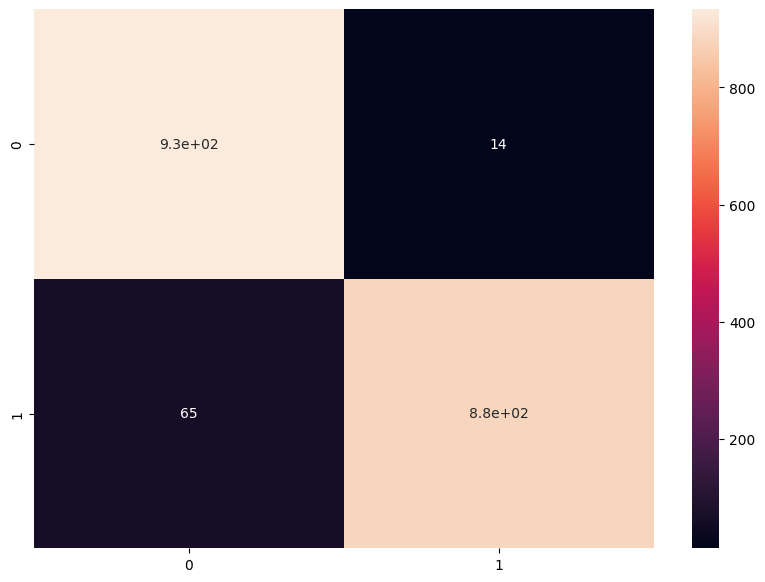

In [218]:
#Confusion Matrix for Proposed model on the data
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X_train_res, y_train_res,stratify = y_train_res, train_size=0.8)

classifier= AdaBoostClassifier(random_state = 0,base_estimator=DecisionTreeClassifier(max_depth = 3),learning_rate=0.1,n_estimators= 150)  
classifier.fit(x_train_over,y_train_over)
y_pred = classifier.predict(x_test_over)
df_cm = pd.DataFrame(confusion_matrix(y_test_over, y_pred))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

ROC AUC=0.985


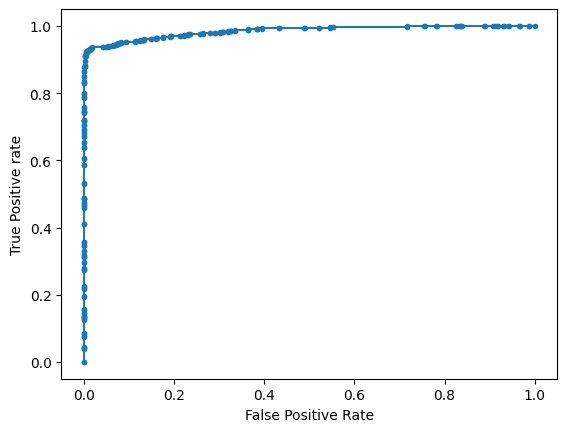

In [220]:
#ROC-AUC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = classifier.predict_proba(x_test_over)
pred_prob = pred_prob[:, 1]
roc_auc = roc_auc_score(y_test_over, pred_prob)
print('ROC AUC=%.3f' % (roc_auc))
fpr, tpr, _ = roc_curve(y_test_over, pred_prob)
plt.plot(fpr,tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.show()